## PREPARE ISIC DIRECTORY FOR TRANING AND VALIDATION

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import shutil

In [3]:
#Load ground truth CSV
gt_df=pd.read_csv('.keras/datasets/ISIC_GT_With_Class_Type.csv')
gt_df.head(2)

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,image_class,class_type
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV,Benign
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV,Benign


### Create Directory and Sub-Directory

In [4]:
# make directories if it doesn't exist
def make_folder(dirname):
        dirname=os.path.join(os.getcwd(),dirname)
        os.makedirs(dirname) if(os.path.isdir(dirname)==False) else print(dirname+' exist')

In [4]:
#delete images
#shutil.rmtree(".keras/datasets/isic_2019/") 

# make_folder('.keras/datasets/isic_2019/train') #isic_2019/train
# make_folder('.keras/datasets/isic_2019/validation') #isic_2019/validation
# make_folder('.keras/datasets/isic_2019/test') #isic_2019/test

In [5]:
# Create Class type sub-directory
make_folder('.keras/datasets/isic_2019/train/Benign') #isic_2019/train
make_folder('.keras/datasets/isic_2019/train/Malignant') #isic_2019/train

make_folder('.keras/datasets/isic_2019/validation/Benign') #isic_2019/validation
make_folder('.keras/datasets/isic_2019/validation/Malignant') #isic_2019/validation

make_folder('.keras/datasets/isic_2019/test/Benign') #isic_2019/test
make_folder('.keras/datasets/isic_2019/test/Malignant') #isic_2019/test
make_folder('.keras/datasets/isic_2019/test/Unknown') #isic_2019/test

class_names=['Benign','Malignant','Unknown']

/home/evelynanyebe/.keras/datasets/isic_2019/train/Benign exist
/home/evelynanyebe/.keras/datasets/isic_2019/train/Malignant exist
/home/evelynanyebe/.keras/datasets/isic_2019/validation/Benign exist
/home/evelynanyebe/.keras/datasets/isic_2019/validation/Malignant exist
/home/evelynanyebe/.keras/datasets/isic_2019/test/Benign exist
/home/evelynanyebe/.keras/datasets/isic_2019/test/Malignant exist
/home/evelynanyebe/.keras/datasets/isic_2019/test/Unknown exist


In [6]:
# function to Copy images 
def copy_images(src_dir,dest_dir,filenames,overwrite_flag=True):
    num_copied=0
    for filename in filenames:
        src_file_path = os.path.join(src_dir,filename)
        dest_file_path=os.path.join(dest_dir,filename)
        if(os.path.isfile(src_file_path)): 
            # Check if file exist in destination to overwrite or not overwrite
            if(os.path.isfile(dest_file_path) & overwrite_flag):
                shutil.copy(src_file_path,dest_dir)
                num_copied +=1
            elif(~os.path.isfile(dest_file_path)):
                shutil.copy(src_file_path,dest_dir)
                num_copied +=1
        else: 
            print('{} does not exist'.format(filename))
    return(num_copied)            

def join_image_ext(images):
    return [x+".jpg" for x in images]

In [7]:
src_dir=".keras/datasets/ISIC_2019_Training_Input"
dest_dir=".keras/datasets/isic_2019"

#Seperate images into class types
malignant=join_image_ext(gt_df.loc[gt_df['class_type']=="Malignant",'image'].to_numpy())
benign=join_image_ext(gt_df.loc[gt_df['class_type']=="Benign",'image'].to_numpy())
unknown=join_image_ext(gt_df.loc[gt_df['class_type']=="Unknown",'image'].to_numpy())

print([len(malignant),len(benign),len(unknown)])

[8473, 12875, 3983]


In [8]:
np.arange(5)      

array([0, 1, 2, 3, 4])

## Copy images to the write sub directory for each class

A ratio of (2/3, 1/6,1/6) is used to seperate images for each class except for **unknown** class which uses (0.5,0.5) for validation, test

In [8]:
#generate sample train, validate and test for each class and copy to folder
def copy_sample(classname,images):
    imgs_count=len(images) #number of images
    
    #index for each directory type
    val_idx=[]
    train_idx=[]
    test_idx=[]
    if(classname=="Unknown"):

        test_idx = np.arange(imgs_count) #numpy array from 0 to imgs_count-1
        
    else:
        rng=np.random.default_rng() #for reproducibility
        random_idx = rng.choice(imgs_count, size=imgs_count, replace=False) # returns a numpy array, shuffles the index based on number of images
        #print(len(random_idx))
        #divide index by ratio 0.7,0.2,0.1  for train, test, validation except 0.5,0.5, test and validation for class Unkown

        val=(imgs_count//10)*2
        test=(imgs_count//10)
        #print(val,test,val+test,imgs_count-(val+test))
        val_idx = random_idx[:val]
        test_idx = random_idx[val:(val+test)]
        train_idx = random_idx[(val+test):]
        print("Index length {} {} {} for train validation and test".format(len(train_idx),len(val_idx),len(test_idx)))
        
        
    #copy images dir_category=[dest_dir+'train/',dest_dir+'test/',dest_dir+'validation/']
    num_train=copy_images(src_dir,"/".join([dest_dir,"train",classname]),
                          np.take(images,train_idx),overwrite_flag=False)
    num_val=copy_images(src_dir,"/".join([dest_dir,"validation",classname]),
                        np.take(images,val_idx),overwrite_flag=False)
    num_test=copy_images(src_dir,"/".join([dest_dir,"test",classname]),
                         np.take(images,test_idx),overwrite_flag=False)
    #prepare a list for number of images copied per sun-directory
    num_per_cat={"train":num_train,"val":num_val,"test":num_test}
    
    print("{} {} images of copied for training".format(num_train,classname))
    print("{} {} images of copied for validating".format(num_val,classname))
    print("{} {} images of copied for testing".format(num_test,classname))
    
    return(num_per_cat) #return number of images per catagory

In [9]:
#seperate test
# unknown_val=np.take(unknown,sample_val_idx) #validation images

#copy images
m = copy_sample("Malignant",malignant)
b = copy_sample("Benign",benign)
u = copy_sample("Unknown",unknown)

# copy_images(src_dir,dest_dirs[0],malignant,overwrite_flag=False)

Index length 5932 1694 847 for train validation and test
5932 Malignant images of copied for training
1694 Malignant images of copied for validating
847 Malignant images of copied for testing
Index length 9014 2574 1287 for train validation and test
9014 Benign images of copied for training
2574 Benign images of copied for validating
1287 Benign images of copied for testing
0 Unknown images of copied for training
0 Unknown images of copied for validating
3983 Unknown images of copied for testing


In [10]:
print(list(b.values()))

[9014, 2574, 1287]


### Confirm that images are copied correctly

In [11]:
data_dir_train = pathlib.Path("/home/evelynanyebe/.keras/datasets/isic_2019/train")
data_dir_val = pathlib.Path("/home/evelynanyebe/.keras/datasets/isic_2019/validation")
data_dir_test = pathlib.Path("/home/evelynanyebe/.keras/datasets/isic_2019/test")

In [12]:
#all images in the folder
imgs_train = len(list(data_dir_train.glob('*/*.jpg')))
imgs_test = len(list(data_dir_test.glob('*/*.jpg')))
imgs_val = len(list(data_dir_val.glob('*/*.jpg')))

print("{} , {} , {} for training, test, validation".format(imgs_train, imgs_test,imgs_val))

14946 , 6117 , 4268 for training, test, validation


### Plot folder structure

In [13]:
class_names

['Benign', 'Malignant', 'Unknown']

In [14]:
x=np.arange(3) #label locations

data = np.array([list(b.values()),list(m.values()),list(u.values())])

totals=sum(data)

percentage_per_class=((data/totals)*100).round(2)
data

array([[9014, 2574, 1287],
       [5932, 1694,  847],
       [   0,    0, 3983]])

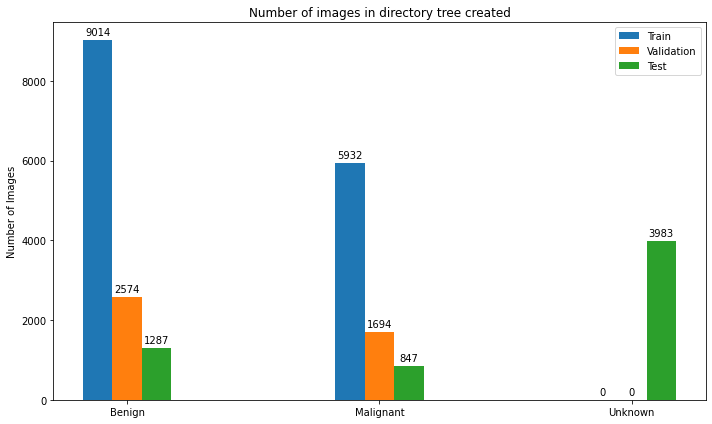

In [15]:
fig, ax = plt.subplots()

#Bar plot for each class
width = 0.35/3 # width of bars

rects1 = ax.bar(x + width, data[:,0], width, label="Train")
rects2 = ax.bar(x + 2*width, data[:,1], width, label="Validation")
rects3 = ax.bar(x + 3*width, data[:,2], width, label="Test")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Images')
ax.set_title('Number of images in directory tree created')
ax.set_xticks(x+(2*width))
ax.set_xticklabels(["Benign","Malignant","Unknown"])
ax.legend()


def autolabel(rects,axes):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        axes.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1,ax)
autolabel(rects2,ax)
autolabel(rects3,ax)

fig.set_size_inches(10,6)
fig.tight_layout()

plt.show()